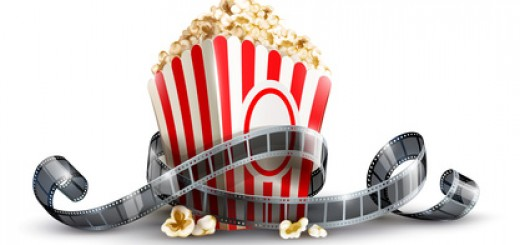

# FINAL PROJECT - Movie Genre Classification

Blanca Ubaque - 201725992

Carolina Trespalacios - 200313688

# 1. Solution using text and images with a Machine Learning algorithm

## Import libraries

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

## Read Data

In [2]:
path = '../Proyecto final/'

In [3]:
dataTraining = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [4]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [5]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


## Create count vectorizer with ngrams

In [6]:
vect = CountVectorizer(ngram_range=(1, 2), max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [7]:
print(vect.get_feature_names()[:50])

['able', 'able to', 'about', 'about the', 'about to', 'accident', 'across', 'act', 'action', 'actually', 'affair', 'after', 'after the', 'again', 'against', 'against the', 'age', 'agent', 'ago', 'alex', 'alive', 'all', 'all of', 'all the', 'alone', 'along', 'along the', 'along with', 'already', 'also', 'although', 'always', 'america', 'american', 'among', 'an', 'an old', 'and', 'and has', 'and he', 'and her', 'and his', 'and is', 'and she', 'and that', 'and the', 'and their', 'and then', 'and they', 'and when']


## Create y

In [8]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

## Split train and test

In [9]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [10]:
y_train_genres = pd.DataFrame(y_train_genres)
y_test_genres = pd.DataFrame(y_test_genres)

## Train multi-class multi-label model

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [12]:
dt = OneVsRestClassifier(DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0))

In [13]:
dt.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          n_jobs=1)

In [14]:
y_pred_genres = dt.predict_proba(X_test)

In [15]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.5712160495028579

In [16]:
sv = OneVsRestClassifier(LinearSVC(random_state=0))

In [17]:
sv.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [18]:
y_pred_genres2 = sv.predict(X_test)

In [19]:
roc_auc_score(y_test_genres, y_pred_genres2, average='macro')

0.6170607693617693

In [20]:
gb = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0))

In [21]:
gb.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False),
          n_jobs=1)

In [22]:
y_pred_genres3 = gb.predict_proba(X_test)

In [23]:
roc_auc_score(y_test_genres, y_pred_genres3, average='macro')

0.6352028882477742

In [103]:
lr= OneVsRestClassifier(LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, intercept_scaling=1, random_state=0, solver='liblinear', max_iter=10, multi_class='ovr', verbose=0, n_jobs=1))

In [104]:
lr.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [105]:
y_pred_genres4 = lr.predict_proba(X_test)

In [27]:
roc_auc_score(y_test_genres, y_pred_genres4, average='macro')

0.7826913527154469

In [28]:
et = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=24, max_depth=None,min_samples_split=2, random_state=0))

In [29]:
et.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          n_jobs=1)

In [30]:
y_pred_genres5 = et.predict_proba(X_test)

In [31]:
roc_auc_score(y_test_genres, y_pred_genres5, average='macro')

0.6882018964401501

## Using images

In [33]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
import skimage
from skimage import io
from PIL import Image

In [34]:
image = io.imread(os.path.join(path, 'images_resize_gray', str(dataTraining.index[0]) + '_resize_gray.jpeg'))

In [35]:
image

array([[ 3,  3,  3, ..., 57, 55, 51],
       [ 3,  3,  3, ..., 99, 98, 95],
       [ 3,  3,  3, ..., 97, 96, 94],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

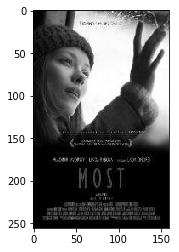

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

In [37]:
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

100%|██████████| 7895/7895 [00:13<00:00, 600.97it/s]


In [38]:
images_training = np.stack(images_training)
images_training.shape, dataTraining.shape[0]

((7895, 40960), 7895)

In [39]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

images_testing = np.stack(images_testing)
images_testing.shape, dataTesting.shape[0]

100%|██████████| 3383/3383 [00:05<00:00, 621.57it/s]


((3383, 40960), 3383)

## Apply PCA

In [40]:
pca = PCA(n_components=100)

In [41]:
images_training_pca = pca.fit_transform(images_training)
images_testing_pca = pca.transform(images_testing)

In [42]:
sum(pca.explained_variance_ratio_)

0.7410471182443972

## Train and test split - images

In [66]:
Xi_train, Xi_test, y_train, y_test = train_test_split(images_training_pca, y_genres, test_size=0.33, random_state=42)

In [67]:
Xi_train.shape,y_train.shape

((5289, 100), (5289, 24))

## Train multi-class multi-label model

In [68]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [69]:
dt = OneVsRestClassifier(DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0))

In [70]:
dt.fit(Xi_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          n_jobs=1)

In [71]:
y_pred_dt = dt.predict(Xi_test)

In [72]:
y_pred_dt.shape

(2606, 24)

In [73]:
roc_auc_score(y_test, y_pred_dt)

0.5146703603307228

In [74]:
sv = OneVsRestClassifier(LinearSVC(random_state=0))

In [75]:
sv.fit(Xi_train, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [76]:
y_pred_sv = sv.predict(Xi_test)

In [77]:
roc_auc_score(y_test, y_pred_sv)

0.5177079177167134

In [78]:
gb = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0))

In [79]:
gb.fit(Xi_train, y_train)

OneVsRestClassifier(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False),
          n_jobs=1)

In [80]:
y_pred_gb = gb.predict(Xi_test)

In [81]:
roc_auc_score(y_test, y_pred_gb)

0.5129824173980452

In [101]:
lr2= OneVsRestClassifier(LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, intercept_scaling=1, random_state=0, solver='liblinear', max_iter=10, multi_class='ovr', verbose=0, n_jobs=1))

In [102]:
lr2.fit(Xi_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [84]:
y_pred_lr = lr.predict(Xi_test)

In [85]:
roc_auc_score(y_test, y_pred_lr)

0.5551970423283487

In [86]:
et = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=24, max_depth=None,min_samples_split=2, random_state=0))

In [87]:
et.fit(Xi_train, y_train)

OneVsRestClassifier(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          n_jobs=1)

In [88]:
y_pred_et = et.predict(Xi_test)

In [89]:
roc_auc_score(y_test, y_pred_et)

0.5036888255568095

### The model that shows best performances was Logistic Regression in both images and text. Now, we're going to join both results by averaging the predicted probabilities

In [94]:
Ynew = (np.array(y_pred_genres4) + np.array(y_pred_lr)) / 2

In [96]:
Ynew.shape

(2606, 24)

In [98]:
roc_auc_score(y_test, Ynew)

0.6956265118539354

## Using the test for kaggle predictions

In [99]:
vect2 = CountVectorizer(ngram_range=(1, 2), max_features=1000)
X_dtm2 = vect2.fit_transform(dataTesting['plot'])
X_dtm2.shape

(3383, 1000)

In [106]:
y_pred_text = lr.predict_proba(X_dtm2)

In [107]:
y_pred_img = lr2.predict_proba(images_testing_pca)

In [108]:
Ynew2 = (np.array(y_pred_text) + np.array(y_pred_img)) / 2

In [110]:
Ynew2.shape

(3383, 24)

## Apply models to kaggle test

In [109]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

pd.DataFrame(Ynew2, index=dataTesting.index, columns=cols).to_csv('pred_genres_text_img_ML.csv', index_label='ID')